# 数据聚合与分组运算

In [4]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
df = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'],
                  'key2':['one', 'two', 'one', 'two','one'],
                  'data1':np.random.randn(5),
                  'data2':np.random.randn(5)})

In [8]:
df

,key1,key2,data1,data2
0,a,one,0.894319,-1.149898
1,a,two,0.690554,2.026557
2,b,one,0.243882,0.345646
3,b,two,0.567257,-0.423698
4,a,one,-1.037015,-0.659680


In [10]:
grouped =df['data1'].groupby(df['key1'])

In [11]:
grouped

In [12]:
grouped.mean()

key1
a    0.182619
b    0.405570
Name: data1, dtype: float64

In [14]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [15]:
means


key1  key2
a     one    -0.071348
      two     0.690554
b     one     0.243882
      two     0.567257
Name: data1, dtype: float64

In [16]:
means.unstack()

key2,one,two
key1,,
a,-0.071348,0.690554
b,0.243882,0.567257


In [17]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

In [29]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [30]:
df['data1'].groupby([states, years]).mean()

California  2005    0.690554
            2006    0.243882
Ohio        2005    0.730788
            2006   -1.037015
Name: data1, dtype: float64

In [31]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.182619,0.072326
b,0.405570,-0.039026


In [32]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.071348 -0.904789
     two   0.690554  2.026557
b    one   0.243882  0.345646
     two   0.567257 -0.423698

In [34]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [35]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.894319 -1.149898
1    a  two  0.690554  2.026557
4    a  one -1.037015 -0.659680
b
  key1 key2     data1     data2
2    b  one  0.243882  0.345646
3    b  two  0.567257 -0.423698


In [37]:
for (k1, k2), group in df.groupby(['key1','key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.894319 -1.149898
4    a  one -1.037015 -0.659680
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.690554  2.026557
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.243882  0.345646
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.567257 -0.423698


In [38]:
pieces = dict(list(df.groupby('key1')))

In [39]:
pieces['b']

,key1,key2,data1,data2
2,b,one,0.243882,0.345646
3,b,two,0.567257,-0.423698


In [41]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [42]:
grouped = df.groupby(df.dtypes, axis=1)

In [43]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  0.894319 -1.149898
1  0.690554  2.026557
2  0.243882  0.345646
3  0.567257 -0.423698
4 -1.037015 -0.659680
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [44]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.904789
     two   2.026557
b    one   0.345646
     two  -0.423698

In [46]:
s_grouped = df .groupby(['key1', 'key2'])['data2']

In [47]:
s_grouped

In [48]:
s_grouped.mean()

key1  key2
a     one    -0.904789
      two     2.026557
b     one     0.345646
      two    -0.423698
Name: data2, dtype: float64

In [49]:
people = pd.DataFrame(np.random.randn(5, 5),
                     columns = ['a','b','c','d','e'],
                     index = ['Joe', 'Steve','Wes','Jim', 'Travis'])

In [50]:
people

,a,b,c,d,e
Joe,1.460387,-0.428714,0.641523,0.258455,-0.426440
Steve,0.358198,0.101539,-0.227900,0.199658,0.270208
Wes,0.359881,2.833945,0.820365,1.184458,2.390399
Jim,0.481119,-0.156399,-0.214485,-1.371731,-1.121320
Travis,-0.520697,0.135933,0.121415,-0.553800,-0.014293


In [52]:
mapping={'a':'red','b':'red', 'c':'blue',
        'd': 'blue', 'e':'red', 'f':'orange'}

In [53]:
by_column = people.groupby(mapping, axis=1)

In [54]:
by_column.sum()

,blue,red
Joe,0.899978,0.605233
Steve,-0.028242,0.729945
Wes,2.004823,5.584225
Jim,-1.586216,-0.796600
Travis,-0.432385,-0.399058


In [55]:
map_series = pd.Series(mapping)

In [56]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [57]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,2,3
Jim,2,3
Travis,2,3


In [58]:
people.groupby(len).sum()

,a,b,c,d,e
3,2.301387,2.248832,1.247402,0.071182,0.842639
5,0.358198,0.101539,-0.227900,0.199658,0.270208
6,-0.520697,0.135933,0.121415,-0.553800,-0.014293


In [59]:
key_list= ['one', 'one', 'one','two','two']

In [60]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one  0.359881 -0.428714  0.641523  0.258455 -0.426440
  two  0.481119 -0.156399 -0.214485 -1.371731 -1.121320
5 one  0.358198  0.101539 -0.227900  0.199658  0.270208
6 two -0.520697  0.135933  0.121415 -0.553800 -0.014293

In [61]:
columns = pd.MultiIndex.from_arrays([['Us', 'Us','Us','Jp','Jp'],
                                    [1, 3, 5, 1,3]],
                                   names=['cty','tenor'])

In [63]:
hier_df=pd.DataFrame(np.random.randn(4,5),columns=columns)

In [64]:
hier_df

cty          Us                            Jp          
tenor         1         3         5         1         3
0      0.344160 -0.951224  0.626734 -0.040097 -0.862962
1     -0.367066  0.818460 -0.893012  0.494023  0.525915
2     -0.614054 -0.525281 -0.792259  0.593056  2.165822
3     -0.349377 -2.507142  0.485244  1.181309 -1.581609

In [65]:
hier_df.groupby(level='cty', axis=1).count()

cty,Jp,Us
0,2,3
1,2,3
2,2,3
3,2,3


In [66]:
df

,key1,key2,data1,data2
0,a,one,0.894319,-1.149898
1,a,two,0.690554,2.026557
2,b,one,0.243882,0.345646
3,b,two,0.567257,-0.423698
4,a,one,-1.037015,-0.659680


In [67]:
grouped = df.groupby('key1')

In [68]:
grouped['data1'].quantile(0.9)

key1
a    0.853566
b    0.534920
Name: data1, dtype: float64

In [70]:
def peak_to_peak(arr):
    return arr.max()- arr.min()

In [71]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.931334,3.176455
b,0.323375,0.769344


In [72]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.182619  1.061136 -1.037015 -0.173231  0.690554  0.792436   
b      2.0  0.405570  0.228660  0.243882  0.324726  0.405570  0.486413   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.894319   3.0  0.072326  1.710071 -1.149898 -0.904789 -0.659680   
b     0.567257   2.0 -0.039026  0.544008 -0.423698 -0.231362 -0.039026   

                          
           75%       max  
key1                      
a     0.683438  2.026557  
b     0.153310  0.345646

In [74]:
tips = pd.read_csv(r'C:\Users\86139\Desktop\python\pydata-book-2nd-edition\examples\tips.csv')

In [75]:
tips['tip_pct'] = tips['tip']/tips['total_bill']

In [76]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [77]:
grouped = tips.groupby(['day', 'smoker'])

In [78]:
grouped_pct = grouped['tip_pct']

In [79]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [81]:
grouped_pct.agg(['mean', 'std',peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [82]:
grouped_pct.agg([('foo', 'mean'),('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [83]:
functions = ['count', 'mean', 'max']

In [85]:
result = grouped['tip_pct', 'total_bill'].agg(functions)

In [86]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [87]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [88]:
ftuples = [('Durchschinitt', 'mean'),('Awbeichung', np.var)]

In [89]:
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct               total_bill            
            Durchschinitt Awbeichung Durchschinitt  Awbeichung
day  smoker                                                   
Fri  No          0.151650   0.000791     18.420000   25.596333
     Yes         0.174783   0.002631     16.813333   82.562438
Sat  No          0.158048   0.001581     19.661778   79.908965
     Yes         0.147906   0.003767     21.276667  101.387535
Sun  No          0.160113   0.001793     20.506667   66.099980
     Yes         0.187250   0.023757     24.120000  109.046044
Thur No          0.160298   0.001503     17.113111   59.625081
     Yes         0.163863   0.001551     19.190588   69.808518

In [93]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [95]:
grouped.agg({'tip_pct':['min', 'max','mean','std'],
            'size':'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

In [96]:
tips.groupby(['day','smoker'],as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


In [97]:
def top(df, n=5, column = 'tip_pct'):
    return df.sort_values(by=column)[-n:]


In [98]:
top(tips, n=5)

,total_bill,tip,smoker,day,time,size,tip_pct
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [99]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [100]:
tips.groupby(['smoker','day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [101]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [103]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [104]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [106]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [107]:
frame = pd.DataFrame({'data1':np.random.randn(1000),
                     'data2':np.random.randn(1000)})

In [108]:
quartiles = pd.cut(frame.data1, 4)

In [109]:
quartiles[:10]

0     (-0.126, 1.356]
1    (-1.609, -0.126]
2    (-1.609, -0.126]
3    (-1.609, -0.126]
4     (-0.126, 1.356]
5    (-1.609, -0.126]
6     (-0.126, 1.356]
7     (-0.126, 1.356]
8    (-3.097, -1.609]
9      (1.356, 2.839]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.097, -1.609] < (-1.609, -0.126] < (-0.126, 1.356] < (1.356, 2.839]]

In [116]:
def get_stats(group):
    return{'min':group.min(), 'max':group.max(),
           'count':group.count(),'mean':group.mean()}

In [118]:
grouped = frame.data2.groupby(quartiles)

In [119]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.097, -1.609]",55.0,2.487700,0.011587,-2.349187
"(-1.609, -0.126]",391.0,2.901745,0.035535,-3.301413
"(-0.126, 1.356]",478.0,2.873948,0.002295,-3.108171
"(1.356, 2.839]",76.0,2.021376,-0.083149,-2.095530


In [120]:
s = pd.Series(np.random.randn(6))

In [121]:
s[::2] = np.nan

In [122]:
s

0         NaN
1   -1.516940
2         NaN
3    0.368491
4         NaN
5   -0.306091
dtype: float64

In [123]:
s.fillna(s.mean())

0   -0.484847
1   -1.516940
2   -0.484847
3    0.368491
4   -0.484847
5   -0.306091
dtype: float64

In [124]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
 'Oregon', 'Nevada', 'California', 'Idaho']

In [125]:
group_key = ['East']*4+['West']*4

In [126]:
data = pd.Series(np.random.randn(8),index=states)

In [127]:
data

Ohio          1.122696
New York     -1.317728
Vermont      -0.830436
Florida      -0.425726
Oregon       -0.429090
Nevada        0.613390
California   -1.172614
Idaho        -0.012394
dtype: float64

In [128]:
data[['Vermont','Nevada','Idaho']] =np.nan

In [129]:
data

Ohio          1.122696
New York     -1.317728
Vermont            NaN
Florida      -0.425726
Oregon       -0.429090
Nevada             NaN
California   -1.172614
Idaho              NaN
dtype: float64

In [130]:
data.groupby(group_key).mean()

East   -0.206919
West   -0.800852
dtype: float64

In [131]:
fill_mean = lambda g:g.fillna(g.mean())

In [132]:
data.groupby(group_key).apply(fill_mean)

Ohio          1.122696
New York     -1.317728
Vermont      -0.206919
Florida      -0.425726
Oregon       -0.429090
Nevada       -0.800852
California   -1.172614
Idaho        -0.800852
dtype: float64

In [133]:
fill_values = {'East':0.5,'West':-1}

In [136]:
fill_func = lambda g:g.fillna(fill_values[g.name])

In [137]:
data.groupby(group_key).apply(fill_func)

Ohio          1.122696
New York     -1.317728
Vermont       0.500000
Florida      -0.425726
Oregon       -0.429090
Nevada       -1.000000
California   -1.172614
Idaho        -1.000000
dtype: float64

In [139]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
deck = pd.Series(card_val, index=cards)

In [140]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [141]:
def draw(deck, n=5):
    return deck.sample(n)

In [142]:
draw(deck)

7S     7
4H     4
KH    10
KC    10
KS    10
dtype: int64

In [143]:
get_suit = lambda card: card[-1]


In [144]:
deck.groupby(get_suit).apply(draw, n=2)

C  9C    9
   4C    4
D  9D    9
   3D    3
H  5H    5
   6H    6
S  2S    2
   8S    8
dtype: int64

In [145]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

4C     4
8C     8
3D     3
6D     6
AH     1
3H     3
3S     3
QS    10
dtype: int64

In [146]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})


In [147]:
df

,category,data,weights
0,a,-0.159859,0.904909
1,a,1.475326,0.502023
2,a,2.440358,0.142557
3,a,2.368060,0.758214
4,b,0.615985,0.075659
5,b,0.755596,0.041763
6,b,2.049964,0.072977
7,b,0.027736,0.795855


In [148]:
grouped = df.groupby('category')

In [151]:
get_wavg = lambda g : np.average(g['data'], weights = g['weights'])

In [152]:
grouped.apply(get_wavg)

category
a    1.187058
b    0.253317
dtype: float64

In [153]:
close_px = pd.read_csv(r'C:\Users\86139\Desktop\python\pydata-book-2nd-edition\examples\stock_px_2.csv', parse_dates=True,
                       index_col=0)



In [154]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [155]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [156]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [157]:
rets = close_px.pct_change().dropna()

In [158]:
get_year = lambda x: x.year

In [159]:
by_year = rets.groupby(get_year)

In [160]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [161]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [163]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [164]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


In [165]:
tips.pivot_table(index = ['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [167]:
tips.pivot_table(['tip_pct', 'size'], index=['time','day'],
                 columns='smoker')



size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [168]:
tips.pivot_table(['tip_pct','size'],index=['time','day'],
                columns = 'smoker',margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [169]:
tips.pivot_table('tip_pct', index=['time','smoker'],
                columns = 'day',
                aggfunc=len , margins =True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [171]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                columns='day', aggfunc='mean', fill_value=0)


day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

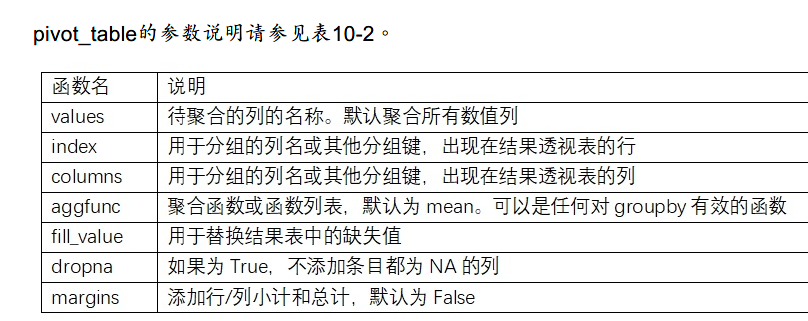

In [179]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""

In [180]:
data = pd.read_table(StringIO(data), sep='\s+')

In [181]:
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [182]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [183]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244